In [1]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

In [2]:
def Gaussexp(z, lamb):
    return 1j*lamb*(z[0]**2+z[1]**2+z[2]**2)

def gradh(z, lamb):
    return 2*1j*lamb*np.conj(z)


In [3]:
# init model
lamb = 1
delta = 1
thresh = -30
tmax = 2.0
dt_init = 0.1

contour = realcontour_nd(20, (-0.5,0.5,-0.5,0.5,-0.5,0.5))

plind = plmodel(contour, Gaussexp, grad=gradh, expargs=[lamb])

In [4]:
plind.descend(delta, thresh, tmax, dt_init)

total steps: 23 current time: 2.0000341200812666


In [5]:
plind.contour.refine_edges(delta/10)

In [6]:
plind.integrate()
print(plind.integral)

((3.9362003598977893-3.93619667872319j), 0.008513130229428918)


In [7]:
(1j*np.pi)**(3/2)

(-3.9374024864306048+3.937402486430605j)

In [8]:
points = plind.contour.points

In [9]:
points

array([[-3.46522797-3.46432854j,  3.46522797+3.46432854j,
        -1.15507599-1.15477618j],
       [-3.46522797-3.46432854j,  3.46522797+3.46432854j,
         1.15507599+1.15477618j],
       [-1.15507599-1.15477618j,  3.46522797+3.46432854j,
        -3.46522797-3.46432854j],
       ...,
       [ 0.3192251 +0.31914224j, -1.28028442-1.27995211j,
         4.28415879+4.28304681j],
       [-1.9401667 -1.93966311j, -4.31799891-4.31687814j,
         1.26336436+1.26303645j],
       [-1.02986756-1.02960025j, -2.62937708-2.6286946j ,
         4.28415879+4.28304681j]])

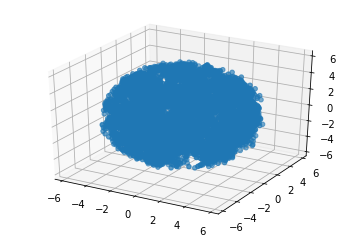

In [10]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0].real, points[:,1].real, points[:,2].real)
plt.show()

In [14]:
np.array([1,2]).T

array([1, 2])